Random Forest Accuracy: 0.77


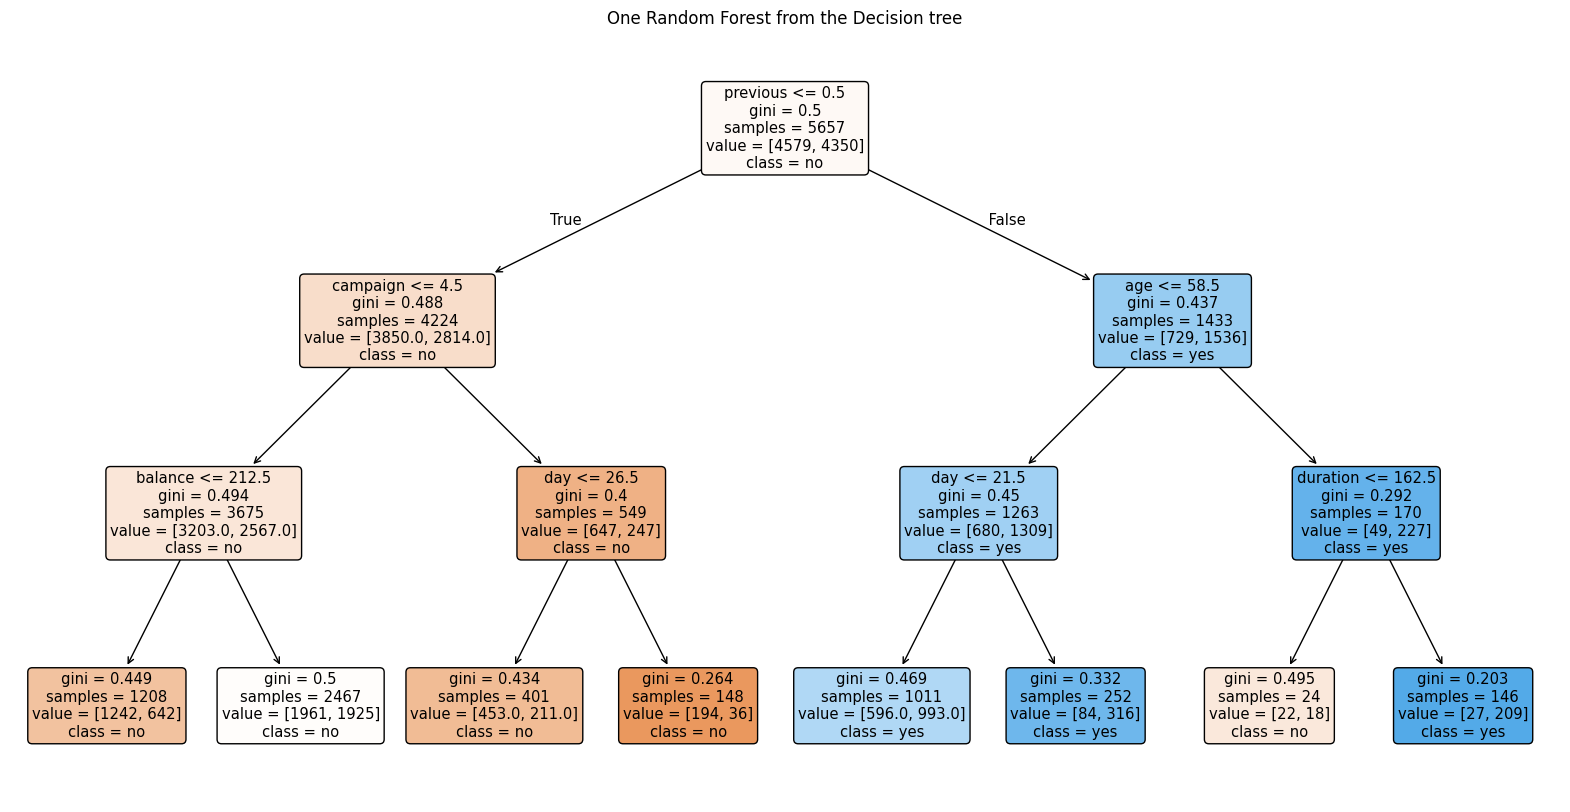

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("bank.csv")

# Convert categorical variables into dummy/indicator variables

feature_cols=['age','balance','day','duration','campaign','pdays','previous']
# Define features and target
X = df[feature_cols]
y = df['deposit']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Optional: View accuracy
accuracy = clf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Visualize one decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], 
          filled=True, 
          rounded=True, 
          feature_names=feature_cols, 
          class_names=[str(i) for i in sorted(df['deposit'].unique())])
plt.title("One Random Forest from the Decision tree")
plt.show()
